<a href="https://colab.research.google.com/github/presentchris/Computer-Vision/blob/main/Practice_of_Stats%26Modelings2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##통계 기초 및 단순 회귀분석
임의로 생성된 데이터셋에 대해 단순 회귀분석을 수행하고, 회귀선을 시각화하기

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
# 데이터셋 생성
np.random.seed(0)
X = 2.5*np.random.randn(100) + 1.5
res = 0.5 * np.random.randn(100)
y = 2+0.3*X+res

In [4]:
# 회귀 모델 학습
X = X.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)

LinearRegression()

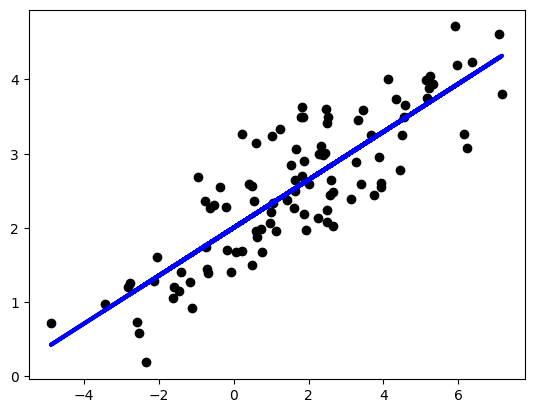

In [5]:
#회귀선 시각화
plt.scatter(X, y, color = 'black')
plt.plot(X, model.predict(X), color='blue', linewidth = 3)
plt.show()

##이미지 분류 모델링
CIFAR-10 데이터셋을 사용하여 간단한 컨볼루션 신경망(CNN) 모델을 구축하고 학습하기. 모델의 정확도를 평가하고 결과를 보고하기.

In [23]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [24]:
#CIFAR-10 데이터셋 로드
(train_X, train_y),(test_X, test_y) = datasets.cifar10.load_data()

In [25]:
#데이터 정규화
train_X, test_X = train_X/255.0, test_X/255.0

In [26]:
#모델 구축
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [29]:
# 모델 컴파일
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

In [31]:
# 모델 학습
history = model.fit(train_X, train_y, epochs = 5, validation_data =(test_X, test_y))

Epoch 1/5
1563/1563 [==============================] - 60s 39ms/step - loss: 1.2665 - accuracy: 0.5475 - val_loss: 1.1187 - val_accuracy: 0.5995
Epoch 2/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0505 - accuracy: 0.6311 - val_loss: 0.9892 - val_accuracy: 0.6534
Epoch 3/5
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9273 - accuracy: 0.6766 - val_loss: 0.9624 - val_accuracy: 0.6638
Epoch 4/5
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8401 - accuracy: 0.7039 - val_loss: 0.9494 - val_accuracy: 0.6671
Epoch 5/5
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7739 - accuracy: 0.7294 - val_loss: 0.8602 - val_accuracy: 0.7013


In [32]:
#모델 평가
test_loss, test_acc = model.evaluate(test_X, test_y, verbose = 2)
print(test_acc)

313/313 - 3s - loss: 0.8602 - accuracy: 0.7013 - 3s/epoch - 9ms/step
0.7013000249862671


##시계열 예측 모델링
임의로 생성된 시계열 데이터에 대해 LSTM 모델을 사용하여 다음 10개 시점의 값을 예측하기. 예측 결과를 시각화하기.

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# 시계열 데이터 생성
np.random.seed(42)
data = np.random.randn(100).cumsum()

In [13]:
# 데이터 전처리(여기서는 간단한 예로 단일 특성만 사용)
X = np.array([data[i:(i+5)] for i in range(len(data) - 10)])
y = data[5:len(data)-5]

In [14]:
# LSTM에 필요한 3D 형태로 변환
X = X.reshape(X.shape[0], X.shape[1], 1)

In [17]:
# LSTM 모델 구축
model = Sequential()
model.add(LSTM(50, activation = 'relu', input_shape = (5,1)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss ='mse')

In [18]:
# 모델 학습
model.fit(X, y, epochs=10, verbose = 2)

Epoch 1/10
3/3 - 2s - loss: 49.4668 - 2s/epoch - 805ms/step
Epoch 2/10
3/3 - 0s - loss: 42.4539 - 13ms/epoch - 4ms/step
Epoch 3/10
3/3 - 0s - loss: 35.7860 - 13ms/epoch - 4ms/step
Epoch 4/10
3/3 - 0s - loss: 29.3295 - 12ms/epoch - 4ms/step
Epoch 5/10
3/3 - 0s - loss: 22.4347 - 13ms/epoch - 4ms/step
Epoch 6/10
3/3 - 0s - loss: 15.3328 - 13ms/epoch - 4ms/step
Epoch 7/10
3/3 - 0s - loss: 8.7367 - 12ms/epoch - 4ms/step
Epoch 8/10
3/3 - 0s - loss: 4.3871 - 12ms/epoch - 4ms/step
Epoch 9/10
3/3 - 0s - loss: 4.3063 - 15ms/epoch - 5ms/step
Epoch 10/10
3/3 - 0s - loss: 5.9424 - 13ms/epoch - 4ms/step


NameError: name 'forecast_full' is not defined

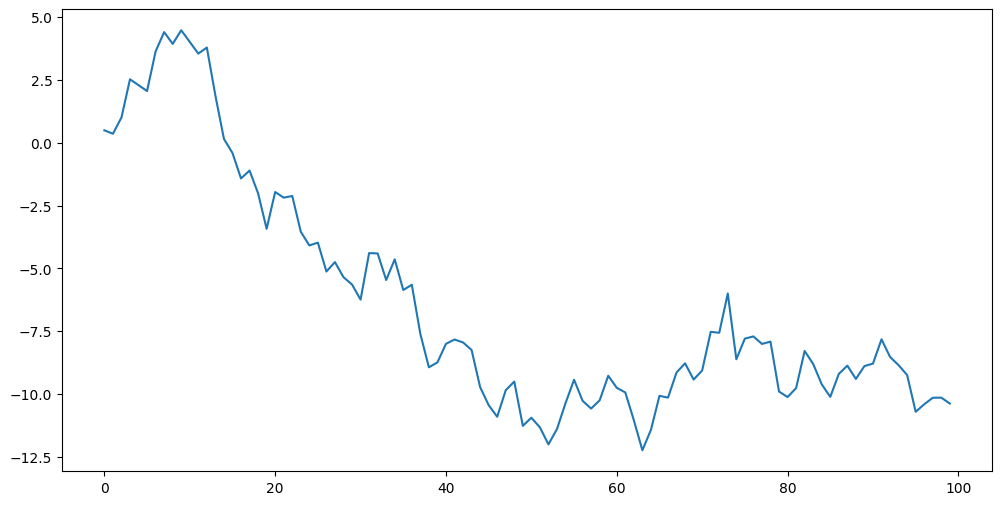

In [33]:
# 예측 결과 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
# 실제 시계열 데이터 플롯
plt.plot(data, label = 'Actual Time Series')
# 예측 결과 추가
plt.plot(forecast_full, label = 'Forecast', linestyle = '--')
# 차트 제목
plt.title('Time Series Forecasting with LSTM')
# x축 레이블
plt.xlabel('Time')
# y축 레이블
plt.ylabel('Value')
# 범례 표시
plt.legend()
plt.show()